# Epidemiology: Part A4 with three errors!

<ins>Extracting $I(t)$ from a simulation of the Stochastic SIR Model</ins>

The Python code below is intended to run a single simulation of the stochastic SIR model, for specific parameter values: $ N=1000$, $\beta = 3 \times 10^{-4}$ and $\mu = 0.1$, corresponding to $R_0 = 3$. The initial conditions are intended to be $S(0) = N - 10$, $I(0) = 10$, and $R(0) = 0$. The idea of this code is to run the simulation and extract values of $I(t)$ at $t = 0, 0.5, 1, ..., 100$, storing these values in the vector $I_{vals}$.  But there are three important mistakes (either typos or incorrect lines of code) for you to find!

In [5]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call np. function_name rather than numpy.
import matplotlib.pyplot as plt

In [6]:
# --- Problem setup --- #

# Parameter values
beta = 3.0*10**-3
mu = 0.1

# Set up arrays to record event times, and values of S, I and R after after each event
SVec = np.array([])
IVec = np.array([])
RVec = np.array([])
tVec = np.array([])

# Set up an array to record pre-determined times and values of I at those times
tVals = np.array([i*0.5 for i in range(201)])
IVals = np.array([0 for i in range(201)])

# Set initial conditions and the initial time
S = 10**3 - 10
I = 10
R = 0
t = 0

IVals[0] = I

# Record initial conditions in the S, I, R and t arrays
SVec = np.append(SVec, S)
IVec = np.append(IVec, I)
RVec = np.append(RVec, R)
tVec = np.append(tVec, t)

In [7]:
# --- While the outbreak is ongoing (I > 0), generate events --- #
  
while I > 0:
    
    previous_time = t
    
    r1 = np.random.uniform(0, 1, 1)
    totalRate = beta*I*S + mu*I
    t = t - (1/totalRate)*np.log(r1)
    
    new_time = t
    
    for i in range(201):
        if tVals[i] < new_time:
            IVals[i] = I
    
    r2 = np.random.uniform(0, 1, 1)
    if r2 < beta*I*S:
        S = S - 1
        I = I + 1
    else:
        I = I - 1
        R = R + 1
        
    SVec = np.append(SVec, S)
    IVec = np.append(IVec, I)
    RVec = np.append(RVec, R)
    tVec = np.append(tVec, t)

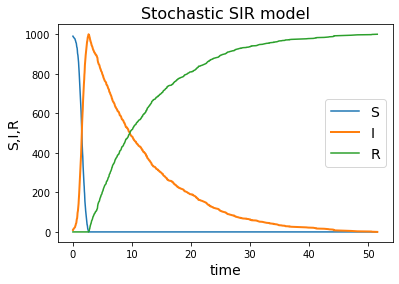

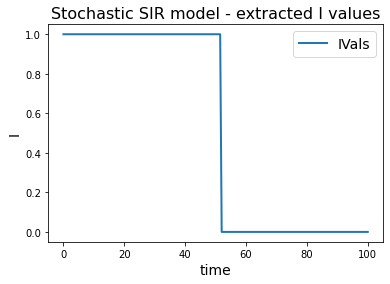

In [8]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.plot(tVec, SVec, label = "S")
plt.plot(tVec, IVec, lw = 2, label = "I")
plt.plot(tVec, RVec, label = "R")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.title("Stochastic SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

# plot the time evolution of I, as recorded in I_vals
plt.plot(tVals, IVals, lw = 2, label = "IVals")

# labels etc
plt.xlabel("time", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.title("Stochastic SIR model - extracted I values", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

